# 使用pyclesperanto检查3D图像数据
本笔记本演示了如何浏览3D图像。

In [1]:
import pyclesperanto_prototype as cle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
# Laod example data
input_image = imread('../../data/Haase_MRT_tfl3d1.tif')

## 复制切片
为了可视化特定的切片，而不让图像离开GPU内存，请使用`copy_slice`方法。

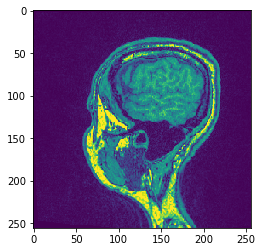

In [3]:
# Copy Slice
image_slice = cle.create([256, 256]);
slice_z_position = 40.0;
cle.copy_slice(input_image, image_slice, slice_z_position)

# show result
cle.imshow(image_slice)

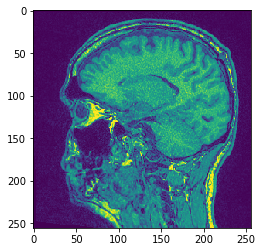

In [4]:
# Alternatively, don't hand over the output image and retrieve it
another_slice = cle.create_2d_xy(input_image)
cle.copy_slice(input_image, another_slice, slice_index = 80)

# show result
cle.imshow(another_slice)

## 投影
pyclesperanto提供了x、y和z方向上的最小值/平均值/最大值和求和投影。

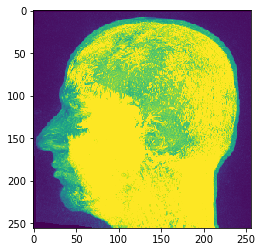

In [5]:
# Maximum Z Projection
projection = cle.maximum_z_projection(input_image)

# show result
cle.imshow(projection)

如果你将图像堆栈传递给`cle.imshow`，它会为你沿Z轴进行最大强度投影：

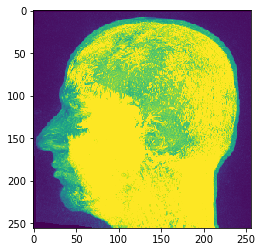

In [6]:
cle.imshow(input_image)

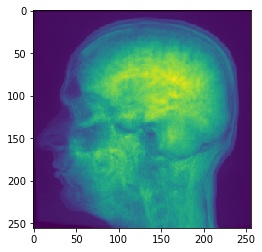

In [7]:
# Sum Z Projection
projection = cle.sum_z_projection(input_image)

# show result
cle.imshow(projection)

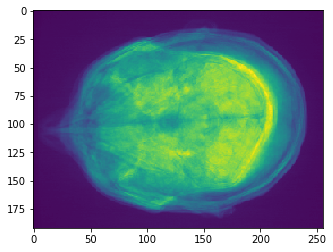

In [8]:
# Mean Y Projection
projection = cle.mean_y_projection(input_image)

# show result
cle.imshow(projection)

## XZ转置
为了在GPU中转置图像的轴，请使用转置方法

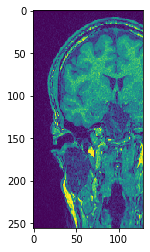

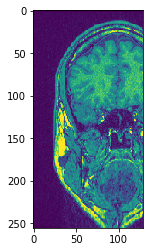

In [9]:
# Transpose X against Z
transposed_image = cle.create([256, 256, 129]);
cle.transpose_xz(input_image, transposed_image)

# show result
cle.imshow(transposed_image[126])
cle.imshow(transposed_image[98])

使用子图将它们并排放置

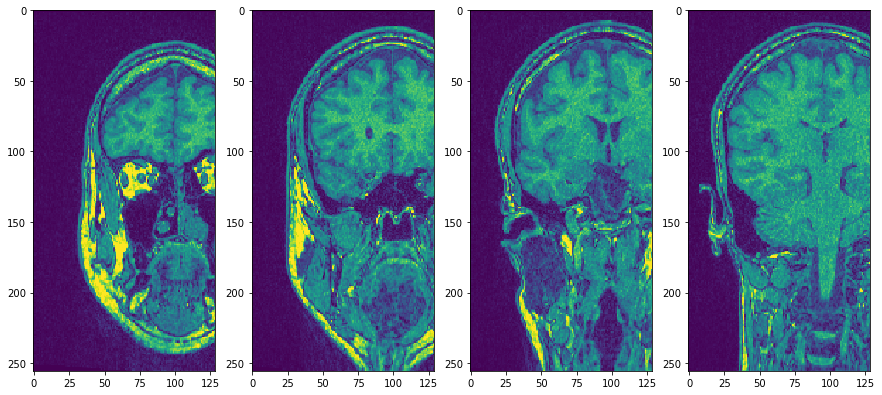

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
cle.imshow(transposed_image[75], plot=axs[0])
cle.imshow(transposed_image[100], plot=axs[1])
cle.imshow(transposed_image[125], plot=axs[2])
cle.imshow(transposed_image[150], plot=axs[3])